In [ ]:
pip install prophet nbformat

  Obtaining dependency information for nbformat from https://files.pythonhosted.org/packages/a9/82/0340caa499416c78e5d8f5f05947ae4bc3cba53c9f038ab6e9ed964e22f1/nbformat-5.10.4-py3-none-any.whl.metadata
  Using cached nbformat-5.10.4-py3-none-any.whl.metadata (3.6 kB)
  Obtaining dependency information for fastjsonschema>=2.15 from https://files.pythonhosted.org/packages/90/2b/0817a2b257fe88725c25589d89aec060581aabf668707a8d03b2e9e0cb2a/fastjsonschema-2.21.1-py3-none-any.whl.metadata
  Obtaining dependency information for jsonschema>=2.6 from https://files.pythonhosted.org/packages/69/4a/4f9dbeb84e8850557c02365a0eee0649abe5eb1d84af92a25731c6c0f922/jsonschema-4.23.0-py3-none-any.whl.metadata
  Using cached jsonschema-4.23.0-py3-none-any.whl.metadata (7.9 kB)
  Obtaining dependency information for attrs>=22.2.0 from https://files.pythonhosted.org/packages/77/06/bb80f5f86020c4551da315d78b3ab75e8228f89f0162f2c3a819e407941a/attrs-25.3.0-py3-none-any.whl.metadata
  Obtaining dependency inform

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Wrangling

In [2]:
df = pd.read_csv("../data/Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")

In [3]:
print(df.shape)
df.head()

(895, 307)


,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31,2024-11-30,2024-12-31,2025-01-31,2025-02-28
0,102001,0,United States,country,NaN,120187.291338,120398.739312,120660.965935,121223.390567,121870.673889,...,352914.638679,353466.996967,353612.598368,353851.962049,354295.143248,354873.991396,355358.916720,356067.058847,356686.351705,357138.132256
1,394913,1,"New York, NY",msa,NY,215997.979545,216915.849088,217842.219756,219719.405192,221663.295718,...,655775.193541,658849.712644,661590.751300,665325.900420,669344.302493,672861.282874,675626.194374,677406.746915,678476.263587,679755.746376
2,753899,2,"Los Angeles, CA",msa,CA,223845.478204,224678.467396,225788.001055,227995.600317,230410.021823,...,939338.772106,943348.163884,947786.830884,953046.620772,959562.454127,964859.346450,969423.172391,973502.535403,974045.970345,971995.753941
3,394463,3,"Chicago, IL",msa,IL,150668.753070,150808.228444,151073.861750,151734.691403,152529.589990,...,314546.393299,315749.091850,316472.773117,317379.333016,318365.905134,319327.319692,320348.475962,321575.006711,322895.868446,324218.209834
4,394514,4,"Dallas, TX",msa,TX,126168.387128,126224.582968,126289.185839,126456.952710,126678.148736,...,375056.853849,374392.029934,373452.807103,372801.133481,372603.234747,372497.321500,372208.925541,371684.816971,371161.901269,370383.507210


In [4]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [5]:
df_melted = df.melt(
    id_vars=['regionid', 'sizerank', 'regionname', 'regiontype', 'statename'],        # keep this column intact
    var_name='date',               # name of the new "column name" column
    value_name='zhvi_price'        # name of the new "value" column
)

In [6]:
df_melted['date'] = pd.to_datetime(df_melted['date'])

In [7]:
df_melted['zhvi_price'] = pd.to_numeric(df_melted['zhvi_price'], errors='coerce')

In [8]:
df_melted = df_melted.dropna(subset=['zhvi_price', 'regionid', 'sizerank', 'regionname', 'regiontype', 'statename'])

In [9]:
unique_cities = df_melted['regionname'].unique()
print(unique_cities)

['New York, NY' 'Los Angeles, CA' 'Chicago, IL' 'Dallas, TX' 'Houston, TX'
 'Washington, DC' 'Philadelphia, PA' 'Miami, FL' 'Atlanta, GA'
 'Boston, MA' 'Phoenix, AZ' 'San Francisco, CA' 'Riverside, CA'
 'Detroit, MI' 'Seattle, WA' 'Minneapolis, MN' 'San Diego, CA' 'Tampa, FL'
 'Denver, CO' 'Baltimore, MD' 'St. Louis, MO' 'Orlando, FL'
 'Charlotte, NC' 'San Antonio, TX' 'Portland, OR' 'Sacramento, CA'
 'Pittsburgh, PA' 'Cincinnati, OH' 'Austin, TX' 'Las Vegas, NV'
 'Kansas City, MO' 'Columbus, OH' 'Cleveland, OH' 'San Jose, CA'
 'Nashville, TN' 'Virginia Beach, VA' 'Providence, RI' 'Jacksonville, FL'
 'Milwaukee, WI' 'Oklahoma City, OK' 'Raleigh, NC' 'Memphis, TN'
 'Richmond, VA' 'Louisville, KY' 'New Orleans, LA' 'Salt Lake City, UT'
 'Hartford, CT' 'Buffalo, NY' 'Birmingham, AL' 'Rochester, NY'
 'Grand Rapids, MI' 'Tucson, AZ' 'Urban Honolulu, HI' 'Tulsa, OK'
 'Fresno, CA' 'Worcester, MA' 'Omaha, NE' 'Bridgeport, CT'
 'Greenville, SC' 'Bakersfield, CA' 'Albany, NY' 'Knoxville, TN'
 'N

In [10]:
df_melted[["city", "state"]] = df_melted["regionname"].str.split(",", expand=True).apply(lambda x: x.str.strip())

In [11]:
locations = df_melted.groupby("state")["city"].apply(lambda x: sorted(x.unique())).to_dict()

In [12]:
df_melted

,regionid,sizerank,regionname,regiontype,statename,date,zhvi_price,city,state
1,394913,1,"New York, NY",msa,NY,2000-01-31,215997.979545,New York,NY
2,753899,2,"Los Angeles, CA",msa,CA,2000-01-31,223845.478204,Los Angeles,CA
3,394463,3,"Chicago, IL",msa,IL,2000-01-31,150668.753070,Chicago,IL
4,394514,4,"Dallas, TX",msa,TX,2000-01-31,126168.387128,Dallas,TX
5,394692,5,"Houston, TX",msa,TX,2000-01-31,121804.562749,Houston,TX
...,...,...,...,...,...,...,...,...,...
270285,753929,935,"Zapata, TX",msa,TX,2025-02-28,128708.596263,Zapata,TX
270286,394743,936,"Ketchikan, AK",msa,AK,2025-02-28,386337.628339,Ketchikan,AK
270287,753874,937,"Craig, CO",msa,CO,2025-02-28,283361.480437,Craig,CO
270288,395188,938,"Vernon, TX",msa,TX,2025-02-28,81560.597125,Vernon,TX


## Visualization

In [14]:
cities_to_plot = ['Portland, OR' , 'Seattle, WA', 'Dallas, TX' ]

In [15]:
filtered = df_melted[df_melted['regionname'].isin(cities_to_plot)]
filtered

,regionid,sizerank,regionname,regiontype,statename,date,zhvi_price,city,state
4,394514,4,"Dallas, TX",msa,TX,2000-01-31,126168.387128,Dallas,TX
15,395078,15,"Seattle, WA",msa,WA,2000-01-31,219843.553594,Seattle,WA
25,394998,25,"Portland, OR",msa,OR,2000-01-31,172050.077644,Portland,OR
899,394514,4,"Dallas, TX",msa,TX,2000-02-29,126224.582968,Dallas,TX
910,395078,15,"Seattle, WA",msa,WA,2000-02-29,220544.278351,Seattle,WA
...,...,...,...,...,...,...,...,...,...
268515,395078,15,"Seattle, WA",msa,WA,2025-01-31,750148.870682,Seattle,WA
268525,394998,25,"Portland, OR",msa,OR,2025-01-31,548618.062109,Portland,OR
269399,394514,4,"Dallas, TX",msa,TX,2025-02-28,370383.507210,Dallas,TX
269410,395078,15,"Seattle, WA",msa,WA,2025-02-28,751241.204396,Seattle,WA


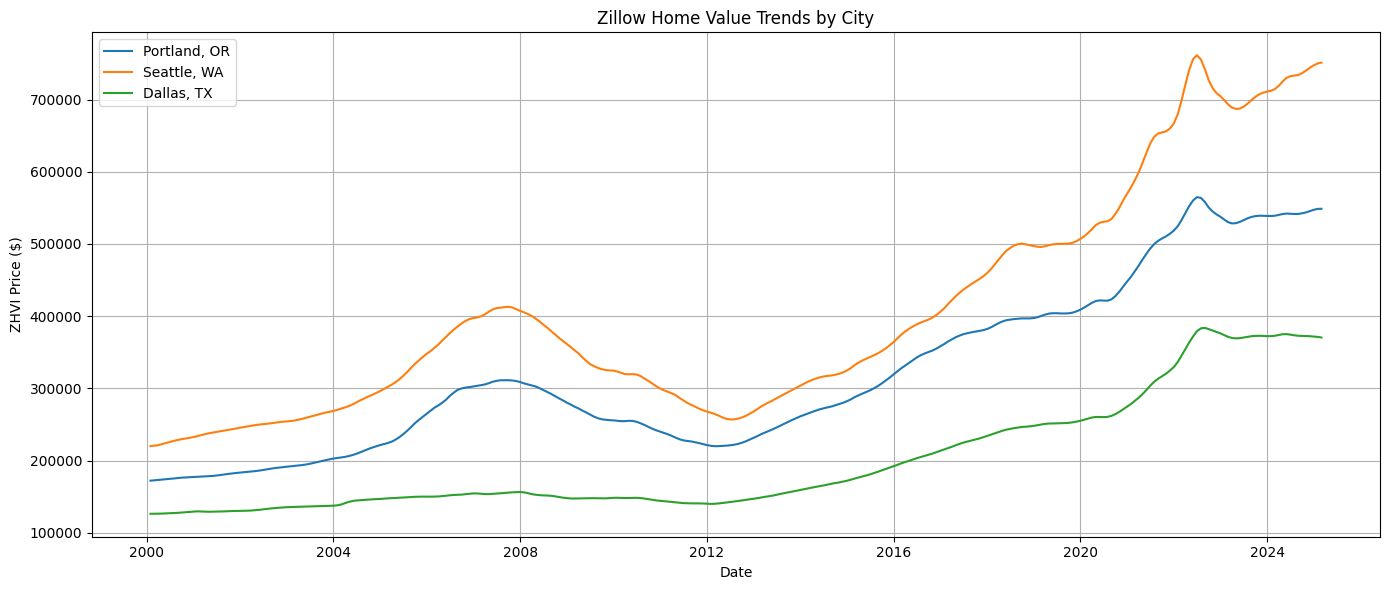

In [16]:
plt.figure(figsize=(14, 6))

for city in cities_to_plot:
    city_data = filtered[filtered['regionname'] == city]
    plt.plot(city_data['date'], city_data['zhvi_price'], label=city)

plt.title("Zillow Home Value Trends by City")
plt.xlabel("Date")
plt.ylabel("ZHVI Price ($)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Forecasting

In [17]:
city = 'Seattle'
state = 'WA'
df_city = df_melted[(df_melted['city'] == city) & (df_melted['state'] == state)][['date', 'zhvi_price']]
df_city = df_city.rename(columns={'date': 'ds', 'zhvi_price': 'y'}) # this data set is meant for prophet to make predictions on

In [18]:
df_melted.shape
df_melted.dtypes

regionid               int64
sizerank               int64
regionname            object
regiontype            object
statename             object
date          datetime64[ns]
zhvi_price           float64
city                  object
state                 object
dtype: object

In [19]:
df_city.shape
df_city.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [21]:
last_date = df_city['ds'].max()
last_date

Timestamp('2025-02-28 00:00:00')

In [24]:
from prophet import Prophet

model = Prophet()
model.fit(df_city)

/home/adharshrajendran/projects/real-estate-forecaster/backend/real-estate/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
17:03:30 - cmdstanpy - INFO - Chain [1] start processing
17:03:30 - cmdstanpy - INFO - Chain [1] done processing


In [25]:
future = model.make_future_dataframe(periods=12, freq='ME')  # Forecast next 12 months
forecast = model.predict(future)

In [29]:
future.shape

(314, 1)

In [28]:
future.dtypes

ds    datetime64[ns]
dtype: object

In [27]:
forecast.shape

(314, 16)

In [33]:
forecast.dtypes

ds                            datetime64[ns]
trend                                float64
yhat_lower                           float64
yhat_upper                           float64
trend_lower                          float64
trend_upper                          float64
additive_terms                       float64
additive_terms_lower                 float64
additive_terms_upper                 float64
yearly                               float64
yearly_lower                         float64
yearly_upper                         float64
multiplicative_terms                 float64
multiplicative_terms_lower           float64
multiplicative_terms_upper           float64
yhat                                 float64
dtype: object

In [32]:
from prophet.plot import plot_plotly
plot_plotly(m=model, fcst=forecast)

In [ ]:
actual = forecast[forecast['ds'] <= last_date].copy()
predicted = forecast[forecast['ds'] > last_date].copy()

In [35]:
plot_plotly(model, actual)

In [36]:
df1, df2 = df, df

In [37]:
def test_function(df1, df2):
    return df1, df2

In [38]:
test_function(df1,df2)

(     regionid  sizerank       regionname regiontype statename     2000-01-31  \
 0      102001         0    United States    country       NaN  120187.291338   
 1      394913         1     New York, NY        msa        NY  215997.979545   
 2      753899         2  Los Angeles, CA        msa        CA  223845.478204   
 3      394463         3      Chicago, IL        msa        IL  150668.753070   
 4      394514         4       Dallas, TX        msa        TX  126168.387128   
 ..        ...       ...              ...        ...       ...            ...   
 890    753929       935       Zapata, TX        msa        TX            NaN   
 891    394743       936    Ketchikan, AK        msa        AK            NaN   
 892    753874       937        Craig, CO        msa        CO   95266.136956   
 893    395188       938       Vernon, TX        msa        TX            NaN   
 894    394767       939       Lamesa, TX        msa        TX            NaN   
 
         2000-02-29     20